Log and visualize the key LSS dipole results since the EB test was proposed in 1984.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.table import Table
import os
import sys

In [4]:
t = Table(names=('author', 'year', 'source_type', 'velocity', 'std'),
         dtype=(str, int, str, float, float))

In [5]:
t.add_row(['Blake & Wall', 2002, 'radio', 577, 370])

t.add_row(['Singal', 2011, 'radio', 1700, 400])

t.add_row(['Rubart & Schwarz', 2013, 'radio', 1387.5, 577.2])

t.add_row(['Tiwari et al.', 2015, 'radio', 1110, 370])

t.add_row(['Colin et al.', 2017, 'radio', 1355, 174])

In [6]:
# peculiar velocity inferred from the CMB
v_from_cmb = 370

[2002, 2011, 2013, 2015, 2017]


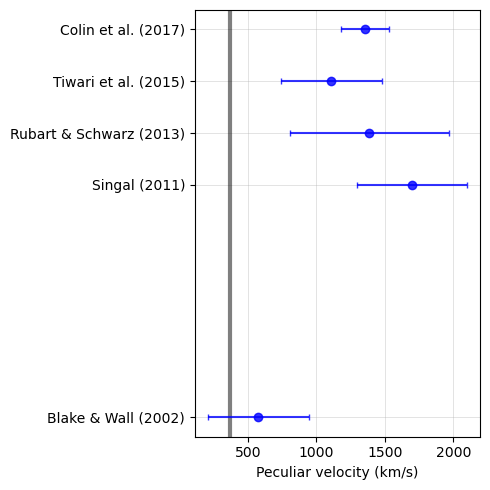

In [7]:
# make a nice summary plot...
fig, ax = plt.subplots(figsize=(5,5), tight_layout=True)

# velocity inferred from the CMB
ax.axvline(v_from_cmb, c='k', alpha=0.5, lw=3)
ax.set_xlabel('Peculiar velocity (km/s)')
ax.grid(alpha=0.5, lw=0.5)
yticks = []
ylabels = []

for i, row in enumerate(t):
    
    if row['source_type'] == 'radio':
        c = 'b'
    elif row['source_type'] == 'qso':
        c = 'r'
    else:
        assert False, "unknown source_type"

    ax.errorbar(row['velocity'], row['year'], xerr=row['std'],
                marker='o', alpha=0.8, capsize=2, c=c)
    
    # y axis ticks/labels by year/author
    yticks.append(row['year'])
    ylabels.append(f"{row['author']} ({row['year']})")

print(yticks)
ax.set_yticks(yticks, labels=ylabels)